In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('combined.csv')
print(df.columns)

Index(['hourly.time', 'hourly.temperature_2m', 'hourly.relative_humidity_2m',
       'hourly.dew_point_2m', 'hourly.apparent_temperature',
       'hourly.precipitation', 'hourly.rain', 'hourly.weather_code',
       'hourly.pressure_msl', 'hourly.surface_pressure', 'hourly.cloud_cover',
       'hourly.cloud_cover_low', 'hourly.cloud_cover_mid',
       'hourly.cloud_cover_high', 'hourly.et0_fao_evapotranspiration',
       'hourly.vapour_pressure_deficit', 'hourly.wind_speed_10m',
       'hourly.wind_speed_100m', 'hourly.wind_direction_10m',
       'hourly.wind_direction_100m', 'hourly.wind_gusts_10m',
       'hourly.soil_temperature_0_to_7cm', 'hourly.soil_temperature_7_to_28cm',
       'hourly.soil_temperature_28_to_100cm',
       'hourly.soil_temperature_100_to_255cm', 'hourly.soil_moisture_0_to_7cm',
       'hourly.soil_moisture_7_to_28cm', 'hourly.soil_moisture_28_to_100cm',
       'hourly.soil_moisture_100_to_255cm', 'hourly.sunshine_duration',
       'hourly.shortwave_radiation', '

In [4]:
df.drop(['hourly.time'], axis=1, inplace=True)

In [5]:
X = df.drop('Fire',axis=1)
y= df['Fire']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((3348, 42), (1116, 42))

In [7]:
X_train.corr()

,hourly.temperature_2m,hourly.relative_humidity_2m,hourly.dew_point_2m,hourly.apparent_temperature,hourly.precipitation,hourly.rain,hourly.weather_code,hourly.pressure_msl,hourly.surface_pressure,hourly.cloud_cover,...,hourly.direct_normal_irradiance,hourly.global_tilted_irradiance,hourly.terrestrial_radiation,hourly.shortwave_radiation_instant,hourly.direct_radiation_instant,hourly.diffuse_radiation_instant,hourly.direct_normal_irradiance_instant,hourly.global_tilted_irradiance_instant,hourly.terrestrial_radiation_instant,region
hourly.temperature_2m,1.000000,-0.880379,-0.165128,0.981491,-0.070060,-0.070060,-0.089759,-0.096143,0.166514,-0.279096,...,0.730793,0.730755,0.698170,0.695470,0.698593,0.448131,0.717078,0.696654,0.652349,-0.157055
hourly.relative_humidity_2m,-0.880379,1.000000,0.561041,-0.801729,0.112123,0.112123,0.130991,-0.022111,-0.300487,0.305508,...,-0.772492,-0.761770,-0.733093,-0.732119,-0.724670,-0.511443,-0.759153,-0.733086,-0.693102,0.100641
hourly.dew_point_2m,-0.165128,0.561041,1.000000,-0.034856,0.100134,0.100134,0.131506,-0.193130,-0.325590,0.124633,...,-0.383842,-0.382107,-0.345206,-0.373129,-0.375058,-0.239498,-0.383972,-0.372774,-0.335828,-0.042050
hourly.apparent_temperature,0.981491,-0.801729,-0.034856,1.000000,-0.078206,-0.078206,-0.092633,-0.100015,0.134669,-0.281818,...,0.695465,0.708732,0.666402,0.680625,0.691282,0.410464,0.683649,0.681644,0.629699,-0.174959
hourly.precipitation,-0.070060,0.112123,0.100134,-0.078206,1.000000,1.000000,0.714061,-0.291776,-0.201042,0.308696,...,-0.079373,-0.031240,0.043661,-0.034231,-0.060590,0.074839,-0.078242,-0.033831,0.039189,0.008333
hourly.rain,-0.070060,0.112123,0.100134,-0.078206,1.000000,1.000000,0.714061,-0.291776,-0.201042,0.308696,...,-0.079373,-0.031240,0.043661,-0.034231,-0.060590,0.074839,-0.078242,-0.033831,0.039189,0.008333
hourly.weather_code,-0.089759,0.130991,0.131506,-0.092633,0.714061,0.714061,1.000000,-0.292440,-0.167228,0.484900,...,-0.108636,-0.021041,0.099716,-0.023741,-0.079457,0.190306,-0.106346,-0.023316,0.096349,0.089996
hourly.pressure_msl,-0.096143,-0.022111,-0.193130,-0.100015,-0.291776,-0.291776,-0.292440,1.000000,0.563269,-0.288083,...,0.009418,-0.025232,-0.077848,0.000133,0.021618,-0.079347,0.014435,-0.000668,-0.047032,-0.048563
hourly.surface_pressure,0.166514,-0.300487,-0.325590,0.134669,-0.201042,-0.201042,-0.167228,0.563269,1.000000,-0.230471,...,0.252573,0.247060,0.214097,0.251196,0.256432,0.146672,0.250663,0.250678,0.217686,0.542807
hourly.cloud_cover,-0.279096,0.305508,0.124633,-0.281818,0.308696,0.308696,0.484900,-0.288083,-0.230471,1.000000,...,-0.265819,-0.121639,0.019573,-0.118266,-0.206094,0.246528,-0.257723,-0.118490,0.025389,0.106094


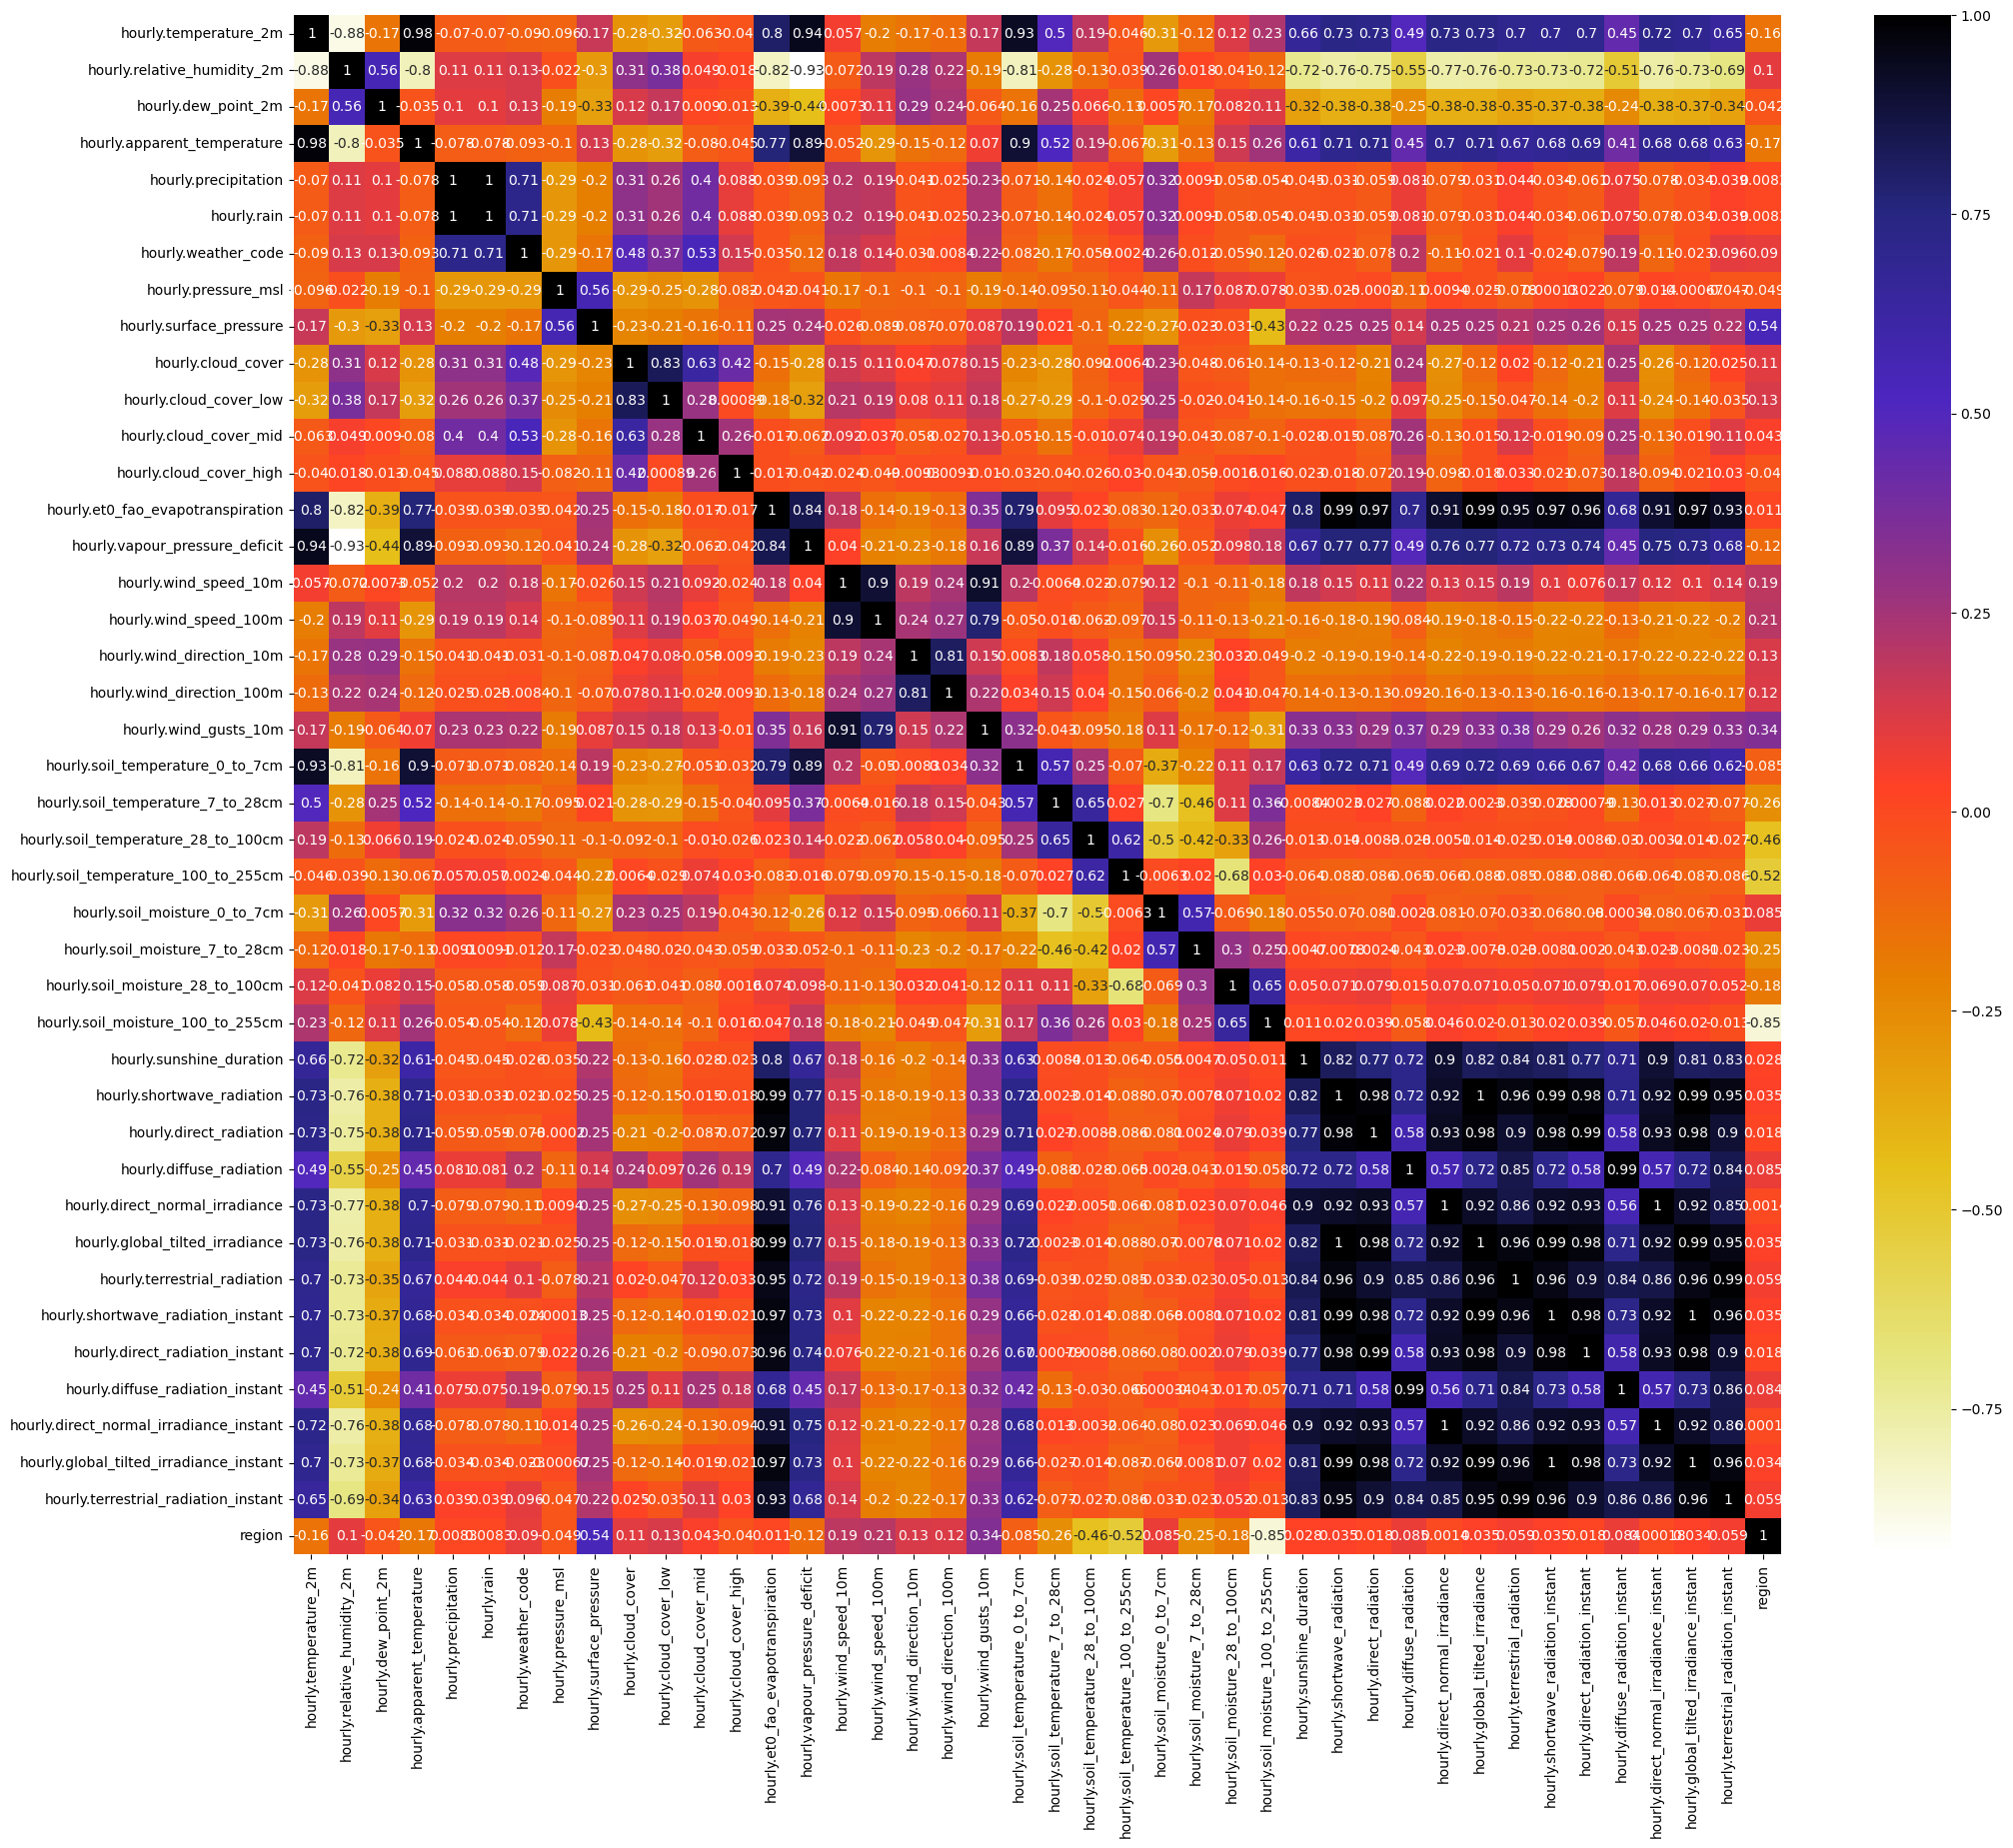

In [9]:
plt.figure(figsize=(24,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.75)
print(corr_features)

print(len(set(corr_features)))
print(len(df.columns))

{'hourly.sunshine_duration', 'hourly.direct_normal_irradiance_instant', 'hourly.relative_humidity_2m', 'hourly.diffuse_radiation_instant', 'hourly.direct_radiation_instant', 'hourly.et0_fao_evapotranspiration', 'hourly.global_tilted_irradiance', 'hourly.shortwave_radiation_instant', 'hourly.apparent_temperature', 'hourly.rain', 'hourly.terrestrial_radiation', 'hourly.shortwave_radiation', 'hourly.direct_radiation', 'region', 'hourly.cloud_cover_low', 'hourly.wind_direction_100m', 'hourly.global_tilted_irradiance_instant', 'hourly.wind_gusts_10m', 'hourly.soil_temperature_0_to_7cm', 'hourly.wind_speed_100m', 'hourly.terrestrial_radiation_instant', 'hourly.direct_normal_irradiance', 'hourly.vapour_pressure_deficit'}
23
43


In [13]:
# drop features with a correlation greater than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((3348, 19), (1116, 19))

In [ ]:
print(X_train.columns)

In [14]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

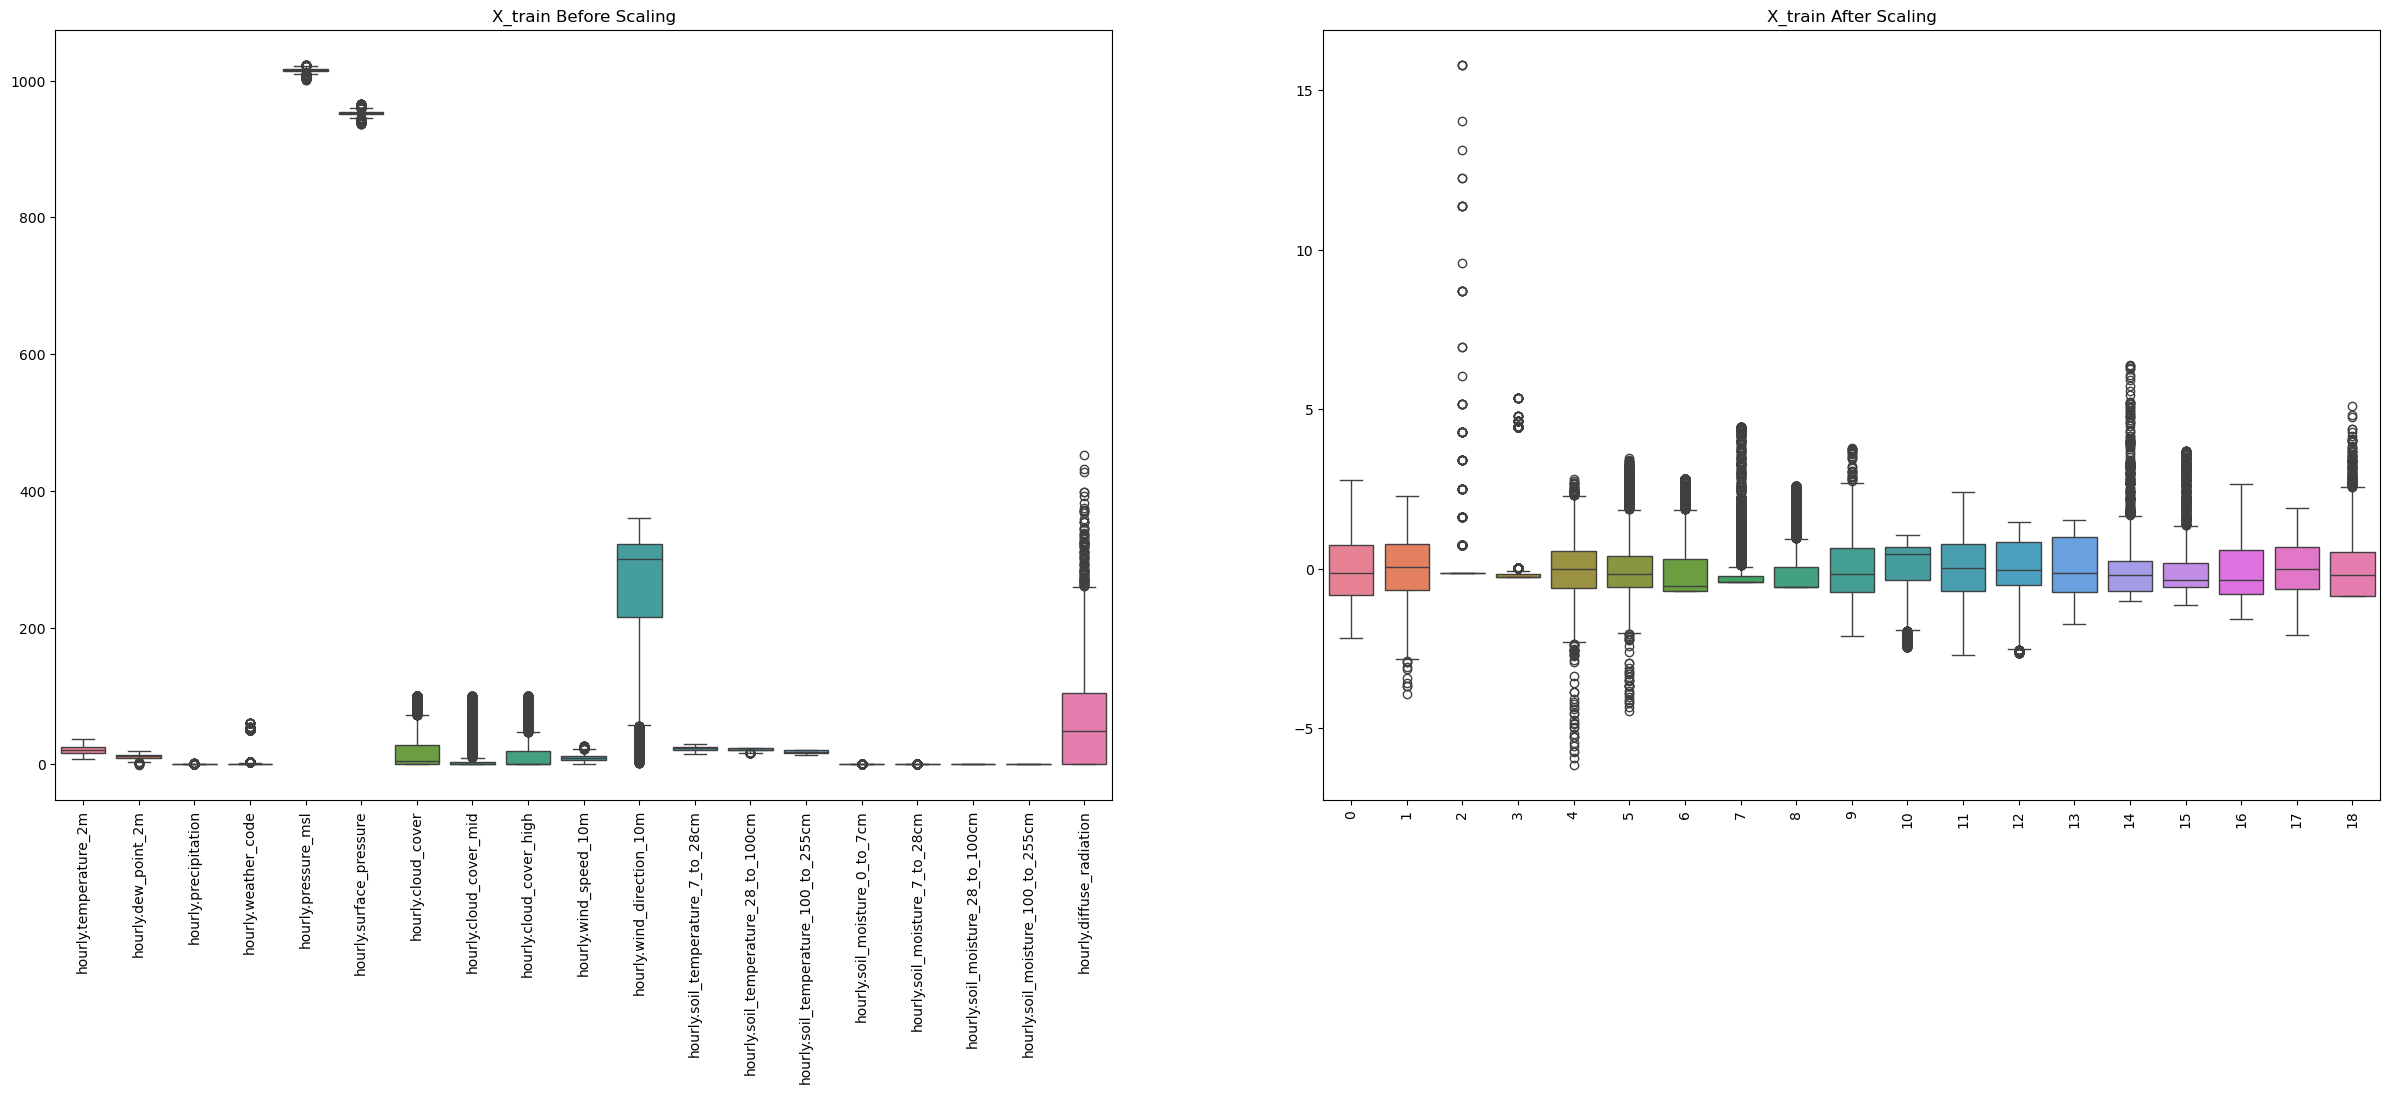

In [17]:
plt.subplots(figsize=(30, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.xticks(rotation=90)  # Rotate x-axis labels

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.xticks(rotation=90)  # Rotate x-axis labels

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.0000
MAE value: 0.0020


In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.0000
MAE value: 0.0719


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.0000
MAE value: 0.0011


In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.0000
MAE value: 0.0007
